# Reproductions of the results in the paper

> Title: **On the non-frame property of Gabor systems with Hermite generators and the frame set conjecture**

> Authors: **Andreas Horst , Jakob Lemvig , Allan Erlang Videbæk**

In [1]:
import tikzplotlib
from gfsp import *
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()

## Figure 1: Plot of hermite functions

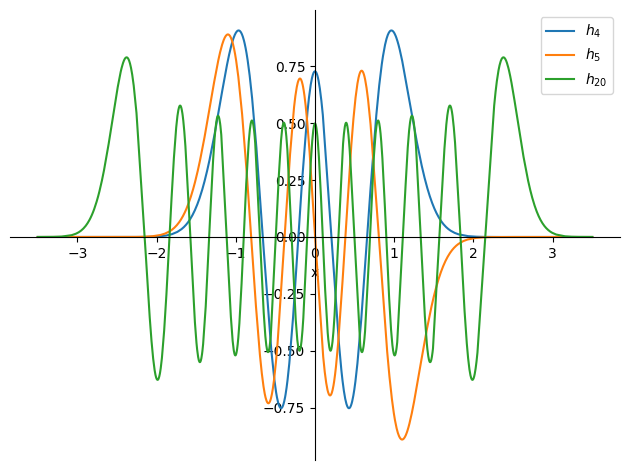

In [2]:
# Orders of the hermite functions to plot
n_order = [4, 5, 20]
# x interval
x_interval = [-3.5, 3.5]
# Plotting the hermite functions in one plot using plot_hermite from the gfsp package
p = plot_hermite(n_order, x_interval)
# fig, (ax) = plt.subplots(ncols=1)
# move_sympyplot_to_axes(p,ax)
# tikzplotlib.save("hermite.tex")

## Figure 2a: Plot of the Zak transform of the Hermite function $Z_{\sqrt{3}\lambda}h_{n}(1/6,1/2)$ as a function of $\lambda$ and for $n=0,2,4,6,8$

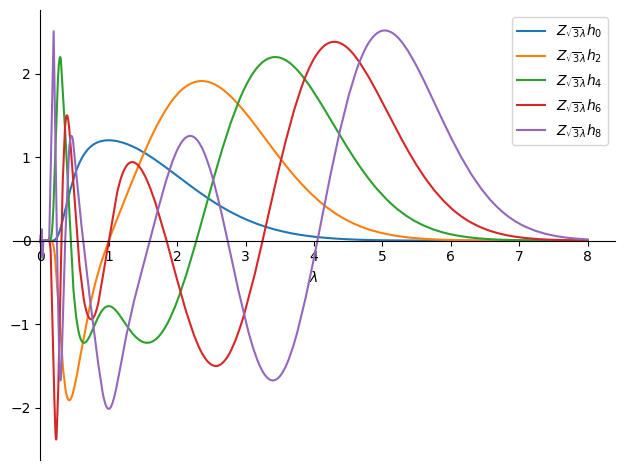

In [3]:
# Setting up the parameters
s = S(sqrt(3))
gam = S(1 / 2)
x = S(1 / 6)

def mod_func(l):
    return s * l

# Truncation parameter
kmax = 25
# Modular parameter symbol
lam = symbols("\lambda", real=True, negative=False)
# Modular parameter range
mod_range = [0, 8]
# Order of the hermite functions
n_order = range(0, 9, 2)
# Plotting the Zak transforms using plot_zak_modular_hermite function in gfsp
p = plot_zak_modular_hermite(mod_func, mod_range, x, gam, kmax, n_order, lam)
# fig, (ax) = plt.subplots(ncols=1)
# move_sympyplot_to_axes(p,ax)
# plt.show()
# tikzplotlib.save("Zak_even_order.tex")

## Figure 2b: Plot of the Zak transform of the Hermite function $Z_{\sqrt{3}2^{\kappa}}h_{n}(1/6,1/2)$ as a function of $\kappa$ for $n=0,2,4,6,8$

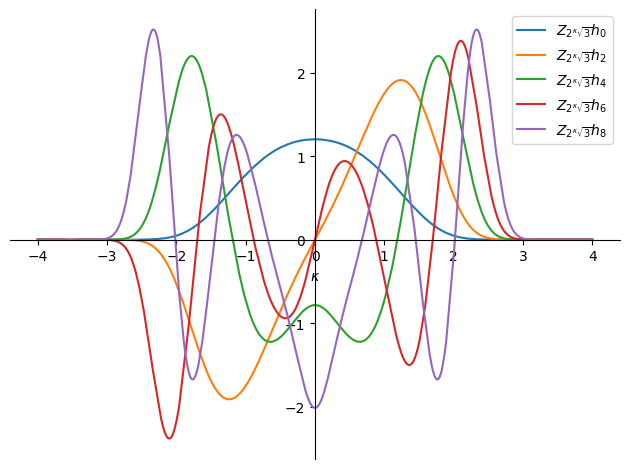

In [4]:
# Setting up the parameters
s = S(sqrt(3))
gam = S(1 / 2)
x = S(1 / 6)


def mod_func(l):
    return s * 2**l


# Truncation parameter
kmax = 20
# Modular parameter symbol
kap = symbols("\kappa", real=True)
# Modular parameter range
mod_range = [-4, 4]
# Order of the hermite functions
n_order = range(0, 9, 2)
# Plotting the Zak transforms using plot_zak_modular_hermite function in gfsp
p = plot_zak_modular_hermite(mod_func, mod_range, x, gam, kmax, n_order, kap)
# fig, (ax) = plt.subplots(ncols=1)
# move_sympyplot_to_axes(p,ax)
# plt.show()
# tikzplotlib.save("Zak_symmetry_even_order.tex")

## Figure 3: Plot of the Zak transform of the Hermite function $Z_{\sqrt{3}2^{\kappa}}h_{n}(1/4,1/2)$ as a function of $\kappa$ for $n=1,3,5,7$

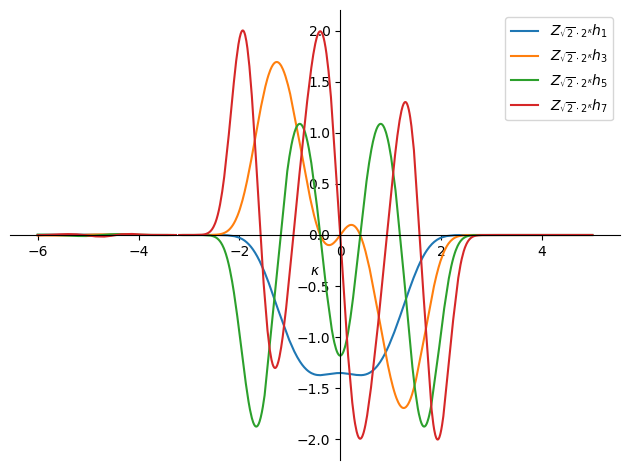

In [5]:
# Setting up the parameters
s = S(sqrt(2))
gam = S(1 / 2)
x = S(1 / 4)


def mod_func(l):
    return s * 2**l


# Truncation parameter
kmax = 20
# Modular parameter symbol
kap = symbols("\kappa", real=True)
# Modular parameter range
mod_range = [-6, 5]
# Order of the hermite functions
n_order = range(1, 9, 2)
# Plotting the Zak transforms using plot_zak_modular_hermite function in gfsp
p = plot_zak_modular_hermite(mod_func, mod_range, x, gam, kmax, n_order, kap)
# fig, (ax) = plt.subplots(ncols=1)
# move_sympyplot_to_axes(p,ax)
# plt.show()
# tikzplotlib.save("Zak_symmetry_odd_order.tex")

In the above figure we see some oscillation on the negative axis around the interval $\kappa\in [-6,-4]$ which are due to significant numerical errors caused by a fixed truncation of the approximate Zak transform series. When the modulation parameters decreases the significant terms of the Zak transform of the Hermite function increases and at $\kappa\leq -4$ the 40 terms in the approximation is not enough. On the contrary we see that no oscillation occurs when $\kappa\geq 0$ which is due to the smaller amount of significant terms in the Zak transform series. Therefore we suggest to use the proved symmetry of the Zak transform to compute the approximation for $\kappa<0$ instead of increasing the truncation paramter.

## Figure 4: Illustration of the bounds on the modular zero $\lambda_{1}$ of the Zaktransform $Z_{\lambda_{1}}h_{n}(1/4,1/2)$

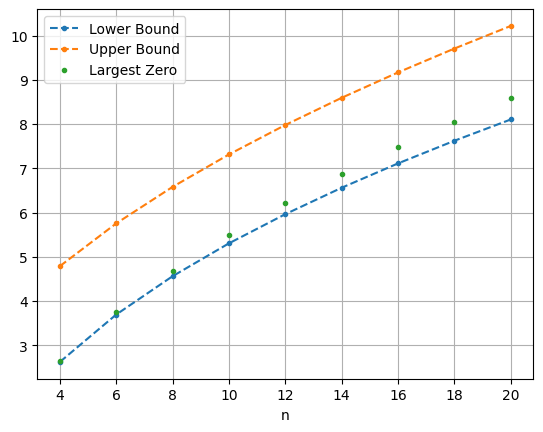

In [8]:
# Hermite function order
n_range = np.arange(4, 22, 2)
# Setting up the parameters
gam = 1 / 2
x = 1 / 4
kmax = 25
lambda_1 = np.zeros(9)
count = 0
# Approximating the largest modular zero of each Zak-transform
for n in n_range:
    # Nummeric verion of the hermite function
    num_hermite = hermite_num(n)

    # Nummeric version of the Zak transform as a function of the modular parameter
    def num_zak(l):
        return num_zak_modular(num_hermite, l, x, gam, kmax)
    # Computing the maximal zero of the Zak transform
    lambda_1[count] = np.max(f_zeros(num_zak, [0.01, 10], 0.01))
    count += 1
# Computing the bounds
low_bound = (
    np.sqrt(3 / 2) / (x * np.sqrt(2 * np.pi)) * (n_range - 1) / (np.sqrt(n_range + 1))
)
up_bound = 1 / (x * np.sqrt(2 * np.pi)) * np.sqrt(2 * n_range + 1)
# Plotting the results
plt.figure()
plt.plot(n_range, low_bound, ".--", label="Lower Bound")
plt.plot(n_range, up_bound, ".--", label="Upper Bound")
plt.plot(n_range, lambda_1, ".", label="Largest Zero")
plt.xlabel("n")
plt.legend()
plt.grid()
# tikzplotlib.save("Zak_zero_bounds.tex")
plt.show()

## Computing the zeros of $Z_{s2^{\kappa}}h_{8}(1/6,1/2)$

To optimize the numerical Zak transform routine we use the $2^{\kappa}$ parametrization of the modular parameter to get better separation of zeros compared to the $\lambda$ parametrization. Additionally, we use the proved symmetry property around $\kappa=0$, such that we only have to compute the zeros of the Zak transform for $\kappa\geq 0$ which we can do precisely with only a few terms in the summation. 

In [9]:
# Setting up the parameters
her_8 = hermite_num(8)
gam = 0.5
x = 1 / 6
s = np.sqrt(3)
kmax = 40

# Defining the numeric Zak transform as a function of kappa
def num_zak(k):
    return num_zak_modular(her_8, s * 2.0**k, x, gam, kmax)

# Computing the zeros in terms of kappa
kap_zero = f_zeros(num_zak, [0, 5], 0.001)
# add negative kap_zero to kap_zero
kap_zero = np.concatenate((-kap_zero[::-1], kap_zero))
lamb_zero = s * 2.0**kap_zero
print(kap_zero)
print(lamb_zero)

[-2.01794767 -1.45344028 -0.67928838  0.67928838  1.45344028  2.01794767]
[0.42765923 0.63245773 1.08161935 2.77361901 4.74339999 7.01493105]


## Table 2

Computing the amount of zeros of the Zak-transforms $Z_{\lambda}h_{n}(1/4,1/2)$ and $Z_{\lambda}h_{n}(1/6,1/2)$ for $n=0,2,\ldots,20$. The results are listed in table 2.

In [16]:
# Order of the hermite functions
n_range = np.arange(0, 22, 2)
# Allocating space
number_zeros_1 = np.zeros(len(n_range))
number_zeros_2 = np.zeros(len(n_range))
# Defining numeric parameters
gam = 0.5
x1 = 1 / 4
x2 = 1 / 6
kmax = 40
count = 0
# taking the modular parameter to be 2**\lambda
# Setting the search interval and spacing
interval = [-3, 5]
space = 0.001
# Computing zeroes
for n in n_range:
    # numeric hermite function
    num_hermite = hermite_num(n)

    # Numeric Zak-transforms
    def num_zak_1(l):
        return num_zak_modular(num_hermite, 2**l, x1, gam, kmax)

    def num_zak_2(l):
        return num_zak_modular(num_hermite, 2**l, x2, gam, kmax)

    # Computing the number of zeroes
    number_zeros_1[count] = len(f_zeros(num_zak_1, interval, space))
    number_zeros_2[count] = len(f_zeros(num_zak_2, interval, space))
    count += 1
# Printing the results
print(number_zeros_1)
print(number_zeros_2)

[ 0.  1.  2.  3.  6.  9. 10. 15. 16. 17. 16.]
[ 0.  1.  2.  5.  6.  7. 10. 13. 18. 19. 20.]


## Table 3

Computing the amount of zeros of the Zak-transforms $Z_{\lambda}h_{n}(1/4,0)$ and $Z_{\lambda}h_{n}(1/6,0)$ for $n=1,3,\ldots,21$. The results are listed in table 3.

In [12]:
# Order of the hermite functions
n_range = np.arange(1, 22, 2)
# Allocating space
number_zeros_1 = np.zeros(len(n_range))
number_zeros_2 = np.zeros(len(n_range))
# Defining numeric parameters
gam = 0.0
x1 = 1 / 4
x2 = 1 / 6
kmax = 40
count = 0
# taking the modular parameter to be 2**\lambda
# Setting the search interval and spacing
interval = [-3, 5]
space = 0.001
# Computing zeroes
for n in n_range:
    # numeric hermite function
    num_hermite = hermite_num(n)

    def num_zak_1(l):
        return num_zak_modular(num_hermite, 2**l, x1, gam, kmax)

    def num_zak_2(l):
        return num_zak_modular(num_hermite, 2**l, x2, gam, kmax)

    # Computing the number of zeroes
    number_zeros_1[count] = len(f_zeros(num_zak_1, interval, space))
    number_zeros_2[count] = len(f_zeros(num_zak_2, interval, space))
    count += 1
# Printing the results
print(number_zeros_1)
print(number_zeros_2)

[ 0.  1.  2.  5.  6.  7.  8. 13. 12. 15. 20.]
[ 0.  1.  4.  5.  6.  9. 10. 11. 16. 15. 18.]
